# SECM Approach Curve Analysis with CNN
***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
import pandas as pd

***
## Building the Analytical Equations

<div>
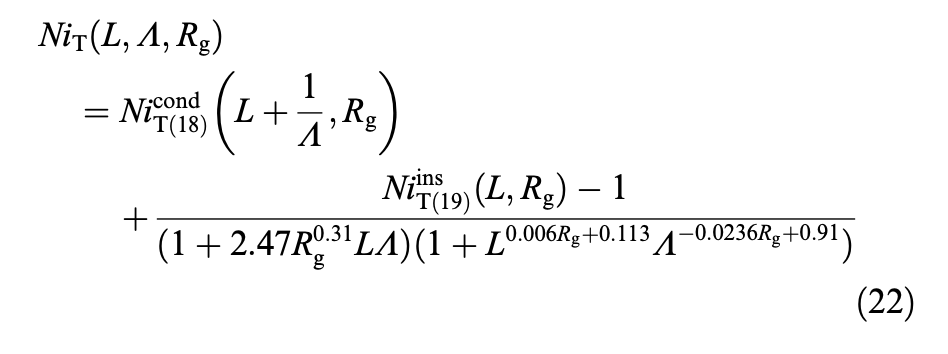
</div>

<div>
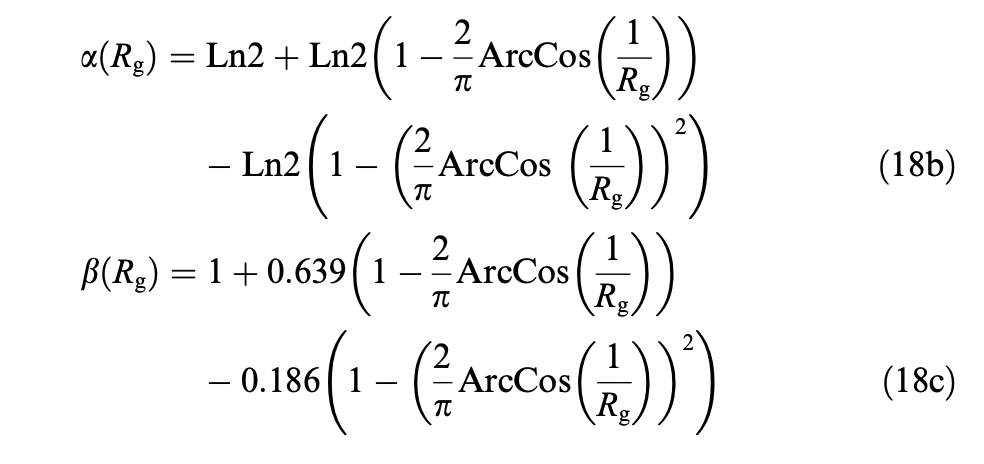
</div>

In [2]:
def get_i_pf(rg, L):
    alpha = log(2) + log(2)*(1-(2/pi)*acos(1/rg)) - log(2)*(1-((2/pi)*acos(1/rg))**2) #log natural log in math
    beta = 1 + 0.639*(1-(2/pi)*acos(1/rg)) - 0.186*(1-((2/pi)*acos(1/rg))**2)
    i_pf = alpha + pi/(4*beta*np.arctan(L)) + (1-alpha-(1/(2*beta)))*(2/pi)*np.arctan(L)
    return i_pf

In [3]:
def get_i_nf(rg, L):
    alpha = log(2) + log(2)*(1-(2/pi)*acos(1/rg)) - log(2)*(1-((2/pi)*acos(1/rg))**2) #log natural log in math
    beta = 1 + 0.639*(1-(2/pi)*acos(1/rg)) - 0.186*(1-((2/pi)*acos(1/rg))**2)
    i_nf_num = (2.08/rg**0.358)*(L-(0.145/rg)) + 1.585
    i_nf_den = (2.08/rg**0.358)*(L+0.0023*rg) + 1.57 + log(rg)/L + (2/(pi*rg))*np.log(1+(pi*rg)/(2*L))
    i_nf = i_nf_num/i_nf_den
    return i_nf

In [4]:
def gen_app_curve(rg, l_stop, Lambda):
    L = np.arange(5+l_stop, l_stop, -0.01)
    
    i_pf = get_i_pf(rg, L+1/Lambda)
    i_nf = get_i_nf(rg, L)
    
    i_mf = i_pf + (i_nf - 1)/((1+2.47*rg**0.31*L*Lambda)*(1+L**(0.006*rg+0.113)*Lambda**(-0.0236*rg+0.91)))
    
    return L, i_mf

<Figure size 432x288 with 0 Axes>

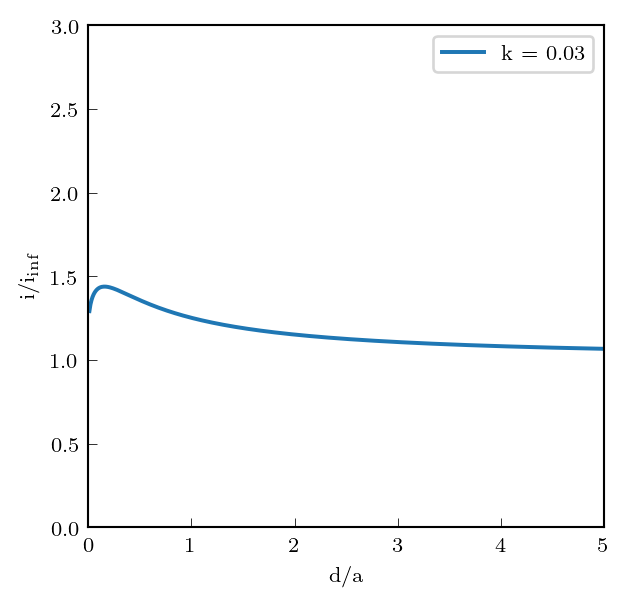

In [34]:
################################################

# k_list = [0.001, 0.01, 0.04, 0.05, 0.1, 1]
k_list = [0.001, 0.01, 0.03, 0.07, 0.1, 1]
D = 1*10**-5 #cm^2/s
a = 5 * 10**-4 #cm
rg = 4

df_0 = pd.read_csv('Exp_0.csv')
df_1 = pd.read_csv('Exp_1.csv')
df_2 = pd.read_csv('Exp_2.csv')
df_3 = pd.read_csv('Exp_3.csv')


Lambda1 = k_list[0]*a/D
Lambda2 = k_list[1]*a/D
Lambda3 = k_list[2]*a/D
Lambda4 = k_list[3]*a/D
Lambda5 = k_list[4]*a/D
Lambda6 = k_list[5]*a/D

x1,y1 = gen_app_curve(rg, 0, Lambda1)
x2,y2 = gen_app_curve(rg, 0, Lambda2)
x3,y3 = gen_app_curve(rg, 0, Lambda3)
x4,y4 = gen_app_curve(rg, 0, Lambda4)
x5,y5 = gen_app_curve(rg, 0, Lambda5)
x6,y6 = gen_app_curve(rg, 0, Lambda6)

plt.figure()
plt.figure(figsize=(3.5, 3.5), dpi = 190)
plt.rc('text', usetex=True)
plt.rc('font', family = 'serif')
plt.xlabel('d/a',fontsize=8)
plt.ylabel(r'i/i$_{\rm inf}$', fontsize=8)

# plt.ylim(0,3)
# plt.xlim(0,5)
# plt.plot(df_0['d_0'],df_0['i_0'], c= 'tab:red')
# # plt.legend(prop={'size': 8})
# plt.tick_params(direction = "in", width = 0.3, labelsize=8)

# plt.ylim(0,3)
# plt.xlim(0,5)
# plt.plot(df_1['d_0'],df_1['i_0'], c= 'tab:blue')
# # plt.legend(prop={'size': 8})
# plt.tick_params(direction = "in", width = 0.3, labelsize=8)

# plt.ylim(0,3)
# plt.xlim(0,5)
# plt.plot(df_2['d_0'],df_2['i_0'], c= 'tab:green')
# # plt.legend(prop={'size': 8})
# plt.tick_params(direction = "in", width = 0.3, labelsize=8)

# plt.ylim(0,3)
# plt.xlim(0,5)
# plt.plot(df_3['d_0'],df_3['i_0'], c= 'tab:orange')
# # plt.legend(prop={'size': 8})
# plt.tick_params(direction = "in", width = 0.3, labelsize=8)

##############################################################################

# plt.ylim(0,3)
# plt.xlim(0, 5)
# plt.plot(x1,y1, label = 'k = 0.001', c= 'tab:red', linestyle = '-')
# plt.legend(prop={'size': 8})
# plt.tick_params(direction = "in", width = 0.3, labelsize=8)

# plt.ylim(0,3)
# plt.xlim(0, 5)
# plt.plot(x2,y2, label = 'k = 0.01', c= 'tab:blue', linestyle = '-')
# plt.legend(prop={'size': 8})
# plt.tick_params(direction = "in", width = 0.3, labelsize=8)

plt.ylim(0,3)
plt.xlim(0, 5)
plt.plot(x3,y3, label = 'k = 0.03', c= 'tab:BLUE', linestyle = '-')
plt.legend(prop={'size': 8})
plt.tick_params(direction = "in", width = 0.3, labelsize=8)


# plt.ylim(0,3)
# plt.xlim(0, 5)
# plt.plot(x4,y4, label = 'k = 0.07', c= 'tab:orange', linestyle = '-')
# plt.legend(prop={'size': 8})
# plt.tick_params(direction = "in", width = 0.3, labelsize=8)

# plt.ylim(0,3)
# plt.xlim(max(x5), min(x5))
# plt.plot(x5,y5, label = 'k = 1', c='orange')
# plt.legend(prop={'size': 8})
# plt.tick_params(direction = "in", width = 0.3, labelsize=8)

plt.show()
################################################

<Figure size 432x288 with 0 Axes>

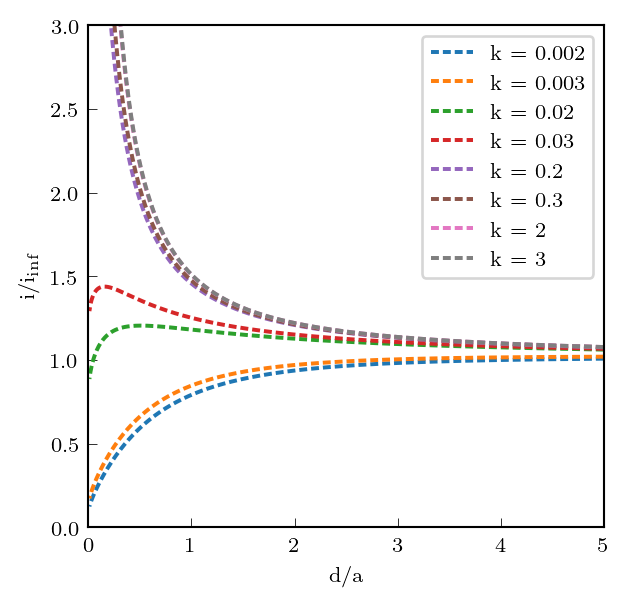

In [18]:
################################################

# k_list = [0.001, 0.01, 0.04, 0.05, 0.1, 1]
k_list = [0.001, 0.002, 0.003, 0.01, 0.02, 0.03, 0.1, 0.2, 0.3, 1, 2, 3]
D = 1*10**-5 #cm^2/s
a = 5 * 10**-4 #cm
rg = 4

Lambda1 = k_list[0]*a/D
Lambda2 = k_list[1]*a/D
Lambda3 = k_list[2]*a/D
Lambda4 = k_list[3]*a/D
Lambda5 = k_list[4]*a/D
Lambda6 = k_list[5]*a/D

Lambda7 = k_list[6]*a/D
Lambda8 = k_list[7]*a/D
Lambda9 = k_list[8]*a/D
Lambda10 = k_list[9]*a/D
Lambda11 = k_list[10]*a/D
Lambda12 = k_list[11]*a/D


0
x1,y1 = gen_app_curve(rg, 0, Lambda1)
x2,y2 = gen_app_curve(rg, 0, Lambda2)
x3,y3 = gen_app_curve(rg, 0, Lambda3)
x4,y4 = gen_app_curve(rg, 0, Lambda4)
x5,y5 = gen_app_curve(rg, 0, Lambda5)
x6,y6 = gen_app_curve(rg, 0, Lambda6)

x7,y7 = gen_app_curve(rg, 0, Lambda7)
x8,y8 = gen_app_curve(rg, 0, Lambda8)
x9,y9 = gen_app_curve(rg, 0, Lambda9)
x10,y10 = gen_app_curve(rg, 0, Lambda10)
x11,y11 = gen_app_curve(rg, 0, Lambda11)
x12,y12 = gen_app_curve(rg, 0, Lambda12)

plt.figure()
plt.figure(figsize=(3.5, 3.5), dpi = 190)
plt.rc('text', usetex=True)
plt.rc('font', family = 'serif')
plt.xlabel('d/a',fontsize=8)
plt.ylabel(r'i/i$_{\rm inf}$', fontsize=8)

##############################################################################

# plt.ylim(0,3)
# plt.xlim(max(x1), min(x1))
# plt.plot(x1,y1, label = 'k = 0.001', c= 'crimson')
# plt.legend(prop={'size': 8})
# plt.tick_params(direction = "in", width = 0.3, labelsize=8)

plt.ylim(0,3)
plt.xlim(0, max(x2))
plt.plot(x2,y2, label = 'k = 0.002', linestyle = 'dashed', dashes = (2,1))
plt.legend(prop={'size': 8})
plt.tick_params(direction = "in", width = 0.3, labelsize=8)

plt.ylim(0,3)
plt.xlim(0, max(x3))
plt.plot(x3,y3, label = 'k = 0.003', linestyle = 'dashed', dashes = (2,1))
plt.legend(prop={'size': 8})
plt.tick_params(direction = "in", width = 0.3, labelsize=8)


# plt.ylim(0,3)
# plt.xlim(max(x4), min(x4))
# plt.plot(x4,y4, label = 'k = 0.01', c= 'deepskyblue')
# plt.legend(prop={'size': 8})
# plt.tick_params(direction = "in", width = 0.3, labelsize=8)

plt.ylim(0,3)
plt.xlim(0, max(x5))
plt.plot(x5,y5, label = 'k = 0.02', linestyle = 'dashed', dashes = (2,1))
plt.legend(prop={'size': 8})
plt.tick_params(direction = "in", width = 0.3, labelsize=8)


plt.ylim(0,3)
plt.xlim(0, max(x6))
plt.plot(x6,y6, label = 'k = 0.03', linestyle = 'dashed', dashes = (2,1))
plt.legend(prop={'size': 8})
plt.tick_params(direction = "in", width = 0.3, labelsize=8)


# plt.ylim(0,3)
# plt.xlim(max(x7), min(x7))
# plt.plot(x7,y7, label = 'k = 0.1')
# plt.legend(prop={'size': 8})
# plt.tick_params(direction = "in", width = 0.3, labelsize=8)


plt.ylim(0,3)
plt.xlim(0, max(x8))
plt.plot(x8,y8, label = 'k = 0.2', linestyle = 'dashed', dashes = (2,1))
plt.legend(prop={'size': 8})
plt.tick_params(direction = "in", width = 0.3, labelsize=8)

plt.ylim(0,3)
plt.xlim(0, max(x9))
plt.plot(x9,y9, label = 'k = 0.3', linestyle = 'dashed', dashes = (2,1))
plt.legend(prop={'size': 8})
plt.tick_params(direction = "in", width = 0.3, labelsize=8)

# plt.ylim(0,3)
# plt.xlim(max(x10), min(x10))
# plt.plot(x10,y10, label = 'k = 1', c='blue')
# plt.legend(prop={'size': 8})
# plt.tick_params(direction = "in", width = 0.3, labelsize=8)

plt.ylim(0,3)
plt.xlim(0, max(x11))
plt.plot(x11,y11, label = 'k = 2', linestyle = 'dashed', dashes = (2,1))
plt.legend(prop={'size': 8})
plt.tick_params(direction = "in", width = 0.3, labelsize=8)

plt.ylim(0,3)
plt.xlim(0, max(x12))
plt.plot(x12,y12, label = 'k = 3', linestyle = 'dashed', dashes = (2,1))
plt.legend(prop={'size': 8})
plt.tick_params(direction = "in", width = 0.3, labelsize=8)

plt.show()
################################################

<Figure size 432x288 with 0 Axes>

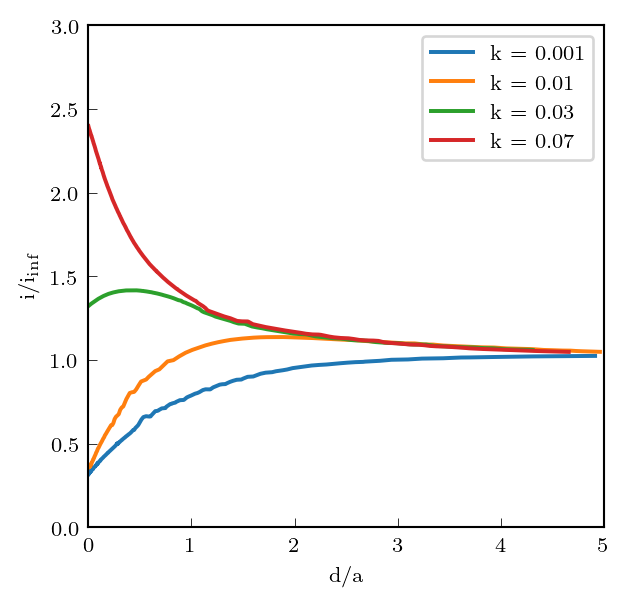

In [19]:
df_0 = pd.read_csv('Exp_0.csv')
df_1 = pd.read_csv('Exp_1.csv')
df_2 = pd.read_csv('Exp_2.csv')
df_3 = pd.read_csv('Exp_3.csv')




plt.figure()
plt.figure(figsize=(3.5, 3.5), dpi = 190)
plt.rc('text', usetex=True)
plt.rc('font', family = 'serif')
plt.xlabel('d/a',fontsize=8)
plt.ylabel(r'i/i$_{\rm inf}$', fontsize=8)

plt.ylim(0,3)
plt.xlim(min(df_0['d_0']),5)
plt.plot(df_0['d_0'],df_0['i_0'], label = 'k = 0.001')
plt.legend(prop={'size': 8})
plt.tick_params(direction = "in", width = 0.3, labelsize=8)

plt.ylim(0,3)
plt.xlim(min(df_1['d_0']),5)
plt.plot(df_1['d_0'],df_1['i_0'], label = 'k = 0.01')
plt.legend(prop={'size': 8})
plt.tick_params(direction = "in", width = 0.3, labelsize=8)

plt.ylim(0,3)
plt.xlim(min(df_2['d_0']),5)
plt.plot(df_2['d_0'],df_2['i_0'], label = 'k = 0.03')
plt.legend(prop={'size': 8})
plt.tick_params(direction = "in", width = 0.3, labelsize=8)

plt.ylim(0,3)
plt.xlim(min(df_3['d_0']),5)
plt.plot(df_3['d_0'],df_3['i_0'], label = 'k = 0.07')
plt.legend(prop={'size': 8})
plt.tick_params(direction = "in", width = 0.3, labelsize=8)




plt.show()
################################################

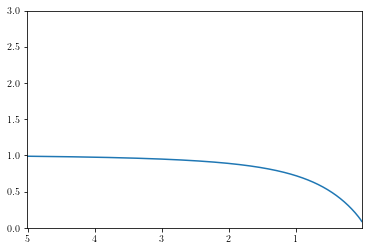

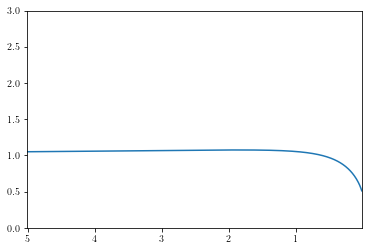

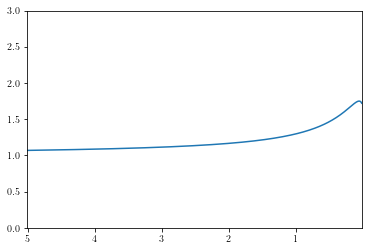

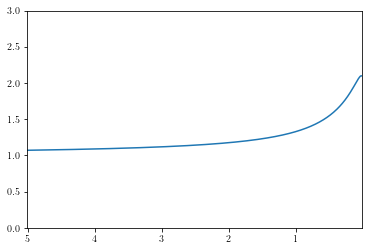

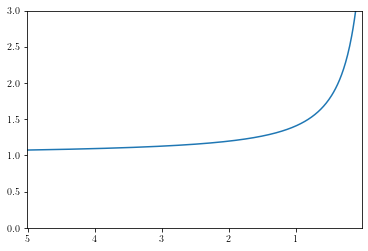

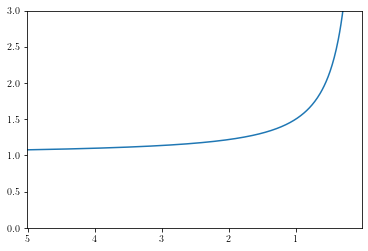

In [8]:
k_list = [0.001, 0.01, 0.04, 0.05, 0.1, 1]
D = 1*10**-5 #cm^2/s
a = 5 * 10**-4 #cm
rg = 4
for k in k_list:
    Lambda = k*a/D
    x,y = gen_app_curve(rg, 0.01, Lambda)
    plt.ylim(0,3)
    plt.xlim(max(x), min(x))
    plt.plot(x,y)
    plt.show()

## Non-linear Curve Fitting on Experimental Data

### Curve 0

In [ ]:
df_0 = pd.read_csv('Exp_0.csv')
plt.ylim(0,3)
plt.xlim(min(df_0['d_0']),max(df_0['d_0']))
plt.plot(df_0['d_0'],df_0['i_0'])

In [ ]:
k = 0.001
D = 1*10**-5 #cm^2/s
a = 5 * 10**-4 #cm
rg = 4
Lambda = k*a/D
x,y = gen_app_curve(rg, 0.1, Lambda)
plt.ylim(0,3)
plt.xlim(max(x), min(x))
plt.plot(x,y)
plt.show()

### Curve 1

In [ ]:
df_1 = pd.read_csv('Exp_1.csv')
plt.ylim(0,3)
plt.xlim(min(df_1['d_0']),max(df_1['d_0']))
plt.plot(df_1['d_0'],df_1['i_0'])

In [ ]:
k = 0.01
D = 1*10**-5 #cm^2/s
a = 5 * 10**-4 #cm
rg = 4
Lambda = k*a/D
x,y = gen_app_curve(rg, 0.01, Lambda)
plt.ylim(0,3)
plt.xlim(max(x), min(x))
plt.plot(x,y)
plt.show()

## Curve 2

In [ ]:
df_2 = pd.read_csv('Exp_2.csv')
plt.ylim(0,3)
plt.xlim(min(df_2['d_0']),max(df_2['d_0']))
plt.plot(df_2['d_0'],df_2['i_0'])

In [ ]:
k = 0.03
D = 1*10**-5 #cm^2/s
a = 5 * 10**-4 #cm
rg = 4
Lambda = k*a/D
x,y = gen_app_curve(rg, 0.01, Lambda)
plt.ylim(0,3)
plt.xlim(max(x), min(x))
plt.plot(x,y)
plt.show()

### Curve 3

In [ ]:
df_3 = pd.read_csv('Exp_3.csv')
plt.ylim(0,3)
plt.xlim(min(df_3['d_0']),max(df_3['d_0']))
plt.plot(df_3['d_0'],df_3['i_0'])

In [ ]:
k = 0.07
D = 1*10**-5 #cm^2/s
a = 5 * 10**-4 #cm
rg = 4
Lambda = k*a/D
x,y = gen_app_curve(rg, 0.01, Lambda)
plt.ylim(0,3)
plt.xlim(max(x), min(x))
plt.plot(x,y)
plt.show()

## Generating Image Libary

In [ ]:
def gen_rgb(k, l_stop):
    D = 1*10**-5 #cm^2/s
    a = 5 * 10**-4 #cm
    rg = 4
    Lambda = k*a/D
    x,y = gen_app_curve(rg, l_stop, Lambda)
    #x,y = gen_fun((0,6.2))
    
    my_dpi = 50
    fig = plt.figure(figsize=(100/my_dpi, 100/my_dpi), dpi=my_dpi)
    ax = fig.add_subplot(1,1,1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim(bottom=0, top=3)
    ax.set_xlim(left = max(x), right=min(x))
    ax.plot(x,y, color=[1,0,0])
    fig.tight_layout(pad=0)

    fig.canvas.draw()

    data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close(fig)
    return data[:,:,2]

In [ ]:
bins = [(0.001,0.0029),
        (0.003, 0.0049),
        (0.005, 0.0069),
        (0.007, 0.0089),
        (0.009, 0.0099),
        (0.01, 0.029),
        (0.03, 0.049),
        (0.05, 0.069),
        (0.07, 0.089),
        (0.09, 0.1)]

In [ ]:
l_stop_list = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3]

In [ ]:
X = []
bin_num = 0
y = []
for k in bins:
    ks = np.linspace(k[0], k[1], 19)
    for k in ks:
        for l_stop in l_stop_list:
            X.append(gen_rgb(k,l_stop))
            y.append(bin_num)
    bin_num += 1

In [ ]:
plt.imshow(X[3000], cmap='gray')

In [ ]:
X = np.array(X)

In [ ]:
X.shape

In [ ]:
X = X.reshape(-1,100,100,1)

In [ ]:
X.shape

In [ ]:
len(y)

## Building the CNN

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=53, stratify = y)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)

In [ ]:
y_train_one_hot[0]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop

In [ ]:
def create_model():
    
    model = Sequential()

    model.add(Input(shape=(100,100,1)))
    model.add(Conv2D(filters = 32, kernel_size = (10,10),padding = 'Same', activation ='relu'))
    model.add(Conv2D(filters = 32, kernel_size = (10,10),padding = 'Same', activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = "softmax"))
    
    optimizer = RMSprop(lr=0.0001, rho=0.9, epsilon=1e-08, decay=0.0)
    
    model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
    
    return model

In [ ]:
epochs = 10
batch_size = 32

In [ ]:
model = create_model()
history = model.fit(X_train, y_train_one_hot, batch_size = batch_size, epochs = epochs, verbose = 2)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred_numbers = np.argmax(y_pred,axis = 1) 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_numbers))

In [ ]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test,y_pred_numbers)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix = c_matrix)
disp.plot()
plt.show()

## Validation Data - Test on Experimental

In [ ]:
def get_exp_images(df):
    x= -df['d_0']
    y = df['i_0']
    
    my_dpi = 50
    fig = plt.figure(figsize=(100/my_dpi, 100/my_dpi), dpi=my_dpi)
    ax = fig.add_subplot(1,1,1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim(bottom=0, top=3)
    ax.set_xlim(left = max(x), right=min(x))
    ax.plot(x,y, color=[1,0,0])
    fig.tight_layout(pad=0)

    fig.canvas.draw()

    data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close(fig)
    return data[:,:,2]

In [ ]:
X_0 = get_exp_images(df_0)
y_0 = 0
plt.imshow(X_0, cmap = 'gray')

In [ ]:
X_1 = get_exp_images(df_1)
y_1 = 5
plt.imshow(X_1, cmap = 'gray')

In [ ]:
X_2 = get_exp_images(df_2)
y_2 = 6
plt.imshow(X_2, cmap = 'gray')

In [ ]:
X_3 = get_exp_images(df_3)
y_3 = 8
plt.imshow(X_3, cmap = 'gray')

In [ ]:
X_val = [X_0, X_1, X_2, X_3]
y_val = [y_0, y_1, y_2, y_3]

In [ ]:
X_val= np.array(X_val)
X_val.shape

In [ ]:
X_val = X_val.reshape(-1,100,100,1)
X_val.shape

In [ ]:
y_pred_exp = model.predict(X_val)

In [ ]:
y_pred_exp_numbers = np.argmax(y_pred_exp,axis = 1) 

In [ ]:
y_pred_exp_numbers

In [ ]:
y_val